# 인공 신경망

In [181]:
# 인공신경망을 구현하기 위한 기본 패키지
import tensorflow as tf

In [182]:
# 실행마다 동일한 결과를 얻기위해 케라스에 랜덤 시드를 사용하고
# 텐서플로우로 연산을 결정적으로 만듭니다.
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

- train_input
 * 하나의 그림 픽셀은 28 x 28
 * 그림의 종류는 10개
 * 그림 데이터는 6만개
- train_target
 * train_input별 정답(Label,Target)

In [183]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [184]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [185]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [186]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


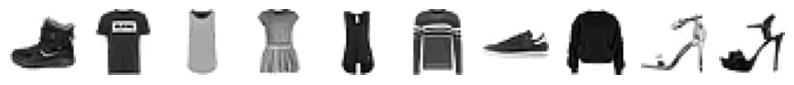

In [187]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    # imshow(이미지픽셀, cmap = 컬러톤)
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [188]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [189]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


## 로지스틱 회귀로 패션 아이템 분류하기

In [190]:
# 이미지 데이터는 표준화를 픽셀값으로 나누어 0~1 사이로 표현해도 무방하다.
train_scaled = train_input / 255.0
# 3차원 데이터를 2차원 데이터로 변환 (2차원 특성을 1차원 특성으로 변환)
train_scaled = train_scaled.reshape(-1, 28*28)

In [191]:
print(train_scaled.shape)

(60000, 784)


In [192]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수중
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.

# 다중분류문제를 log의 조합으로 처리한다
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
# max_iter = 5 : 5번 학습

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8192833333333333


# 인공신경망

## 텐서플로와 케라스

In [193]:
import tensorflow as tf
from tensorflow import keras

# 인공신경망으로 모델 만들기

In [194]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
     train_scaled, train_target, test_size = 0.2, random_state = 42)

In [195]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [196]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [197]:
# 딥러닝에서는 데이터셋을 층이라고 표현한다. (ex) train_input => 입력층
# 784개의 입력을 10개의 출력으로 처리
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))
# softmax => 다중분류 사용할 때 쓰는 함수
# sigmoid => 2진분류 사용할 때 쓰는 함수

In [198]:
model = keras.Sequential(dense)

# 인공신경망으로 패션 아이템 분류하기

In [199]:
# 이진분류 : binary_crossentropy
# 다중분류 : categorical_crossentropy -> 타겟이 원핫 인코딩이 되어있는 경우 사용
#            sparse_categorical_crossentropy -> 다중 분류일 경우 타겟이 원핫 인코딩일 경우
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [200]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [201]:
model.fit(train_scaled, train_target, epochs = 5)
# epochs = 5 : 5번 학습

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4280 - accuracy: 0.8555


In [202]:
model.evaluate(val_scaled, val_target)
# 손실(loss), 정답률(accuracy) 반환

375/375 [==============================] - 0s 961us/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]

---

# 심층 신경망

In [203]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [204]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [206]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [207]:
# 입력층의 선형값을 비선형값으로 바꾸어 압축
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape =(784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

## 심층 신경망 만들기

In [208]:
model = keras.Sequential([dense1, dense2])

In [209]:
# 해당 층에대한 정보를 볼 수 있다.
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               78500     
                                                                 
 dense_41 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층을 추가하는 다른 방법

In [210]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = '패션 MNIST 모델')

In [211]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [212]:
model = keras.Sequential()
# 각 층마다 적절한 활성화 함수를 사용하자(softmax,sigmoid, relu등)
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [213]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               78500     
                                                                 
 dense_43 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.8782


In [215]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3607 - accuracy: 0.8669


[0.3606799244880676, 0.8669166564941406]

In [216]:
# 몇개의 은닉층을 둘 것인가?
# 은닉층이 있으면 성능이 좋아지지만 무작정 은닉층을 늘리다보면 성능이 떨어지는 구간이 발생한다.

### 렐루 활성화 함수

In [217]:
model = keras.Sequential()
# Flatten : 입력층의 이미지를 1차원 배열 형태로 만들어주기 위해 케라스에서 제공하는 전용 입력층
#           np.reshape와 같은 효과
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# relu: 은닉층에 사용하는 활성화 함수로써 sigmoid 함수보다 성능이 더 좋은것으로 알려져있다.
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [218]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 100)               78500     
                                                                 
 dense_45 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [219]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

In [221]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5291 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8578
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3323 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3137 - accuracy: 0.8866


In [222]:
test_scaled = test_input / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8631


[0.4000748097896576, 0.863099992275238]

In [223]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8702


[0.37970128655433655, 0.8702499866485596]

## 옵티마이저

##### Default 옵티마이저는 RMSProp이지만 Adam을 쓰자 (RMSProp은 더 나은 결과가 있는지 확인용)

In [228]:
# 손실함수를 통하여 최적의 가중치와 절편을 찾는 방법을 optimizer 옵션에서 지정한다.
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [229]:
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [230]:
# learning_rate 옵션 사용법
# learning_rate도 자주 손대는 하이퍼 파라메터. 보통은 0.01을 사용한다
# learning_rate : 가중치와 절편을 찾을 때 다음 파라메터를 얼만큼 옮길 것인가 결정한다.

sgd = keras.optimizers.SGD(learning_rate=0.1)

In [231]:
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [232]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [233]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')
#여기까지 adam이외의 하이퍼 파라메터 사용법

In [234]:
model = keras.Sequential()
# input_shape : Flatten층 N차원 입력을 1차원 입력층으로 변경
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [235]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3058 - accuracy: 0.8872


In [236]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508651852607727, 0.875083327293396]

---

# 신경망 모델 훈련

In [237]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [253]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

In [254]:
len(train_target)

48000

In [247]:
len(train_scaled)

48000

In [248]:
# 층을 만드는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [249]:
model = model_fn()
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 100)               78500     
                                                                 
 dense_51 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [257]:
len(train_scaled)

48000

In [256]:
len(train_target)

48000

In [162]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [163]:
history.history

{'loss': [0.5311373472213745,
  0.3908096253871918,
  0.35382795333862305,
  0.32939955592155457,
  0.3149791657924652],
 'accuracy': [0.8112499713897705,
  0.8596458435058594,
  0.8720208406448364,
  0.8823333382606506,
  0.8868125081062317]}

In [164]:
# loss : 손실값, accuracy : 정답률
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


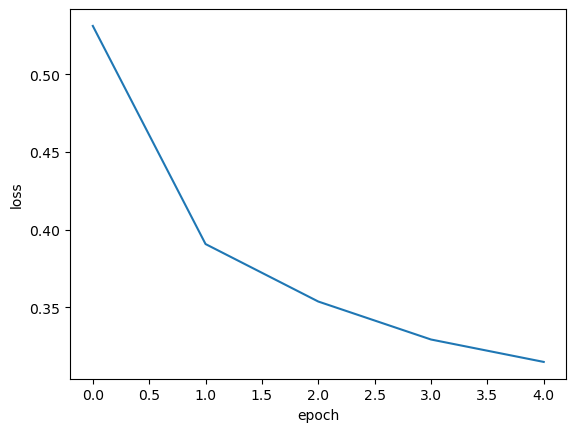

In [165]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

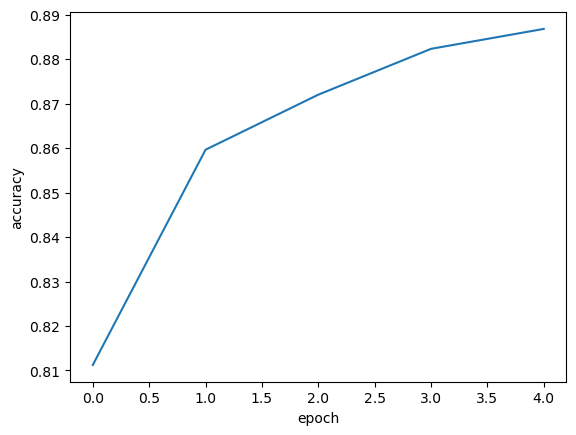

In [166]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [167]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# epochs를 20으로 바꾸어 학습횟수를 늘렸을 경우
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

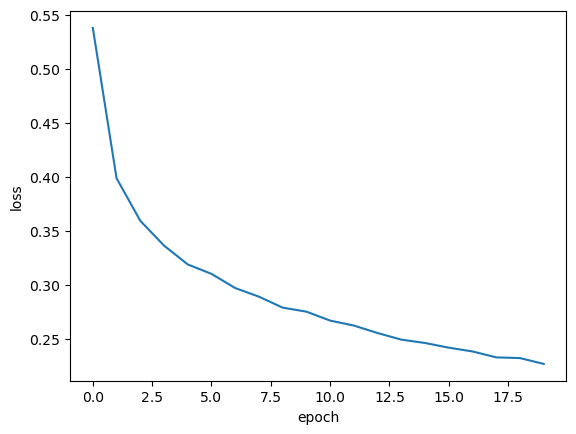

In [168]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증손실
 * 과대적합,과소접합을 판단하기 위한 시각화

In [172]:
len(train_input)

60000

In [173]:
len(train_target)

48000

In [258]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                   validation_data = (val_scaled, val_target))
# validation_data : 시험데이터

In [259]:
# loss : 훈련데이터의 손실값, accuracy : 훈련데이터의 정답률
# val_loss : 시험데이터의 손실값, val_accuracy : 시험데이터의 정답률
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [262]:
history.history

{'loss': [0.5350397229194641,
  0.39443305134773254,
  0.3546607196331024,
  0.33385419845581055,
  0.3169018030166626,
  0.30876126885414124,
  0.2962609529495239,
  0.2893270254135132,
  0.27949386835098267,
  0.2734258472919464,
  0.266819566488266,
  0.2616824507713318,
  0.25342243909835815,
  0.2497486025094986,
  0.24586842954158783,
  0.2417387068271637,
  0.2363714873790741,
  0.23291316628456116,
  0.22947277128696442,
  0.22446298599243164],
 'accuracy': [0.8104583621025085,
  0.8585000038146973,
  0.8727499842643738,
  0.8804166913032532,
  0.8855000138282776,
  0.8895208239555359,
  0.8929374814033508,
  0.8973333239555359,
  0.901604175567627,
  0.9027291536331177,
  0.9070624709129333,
  0.9080208539962769,
  0.9118958115577698,
  0.9115833044052124,
  0.9140625,
  0.9154791831970215,
  0.9190208315849304,
  0.9197916388511658,
  0.9210416674613953,
  0.9228125214576721],
 'val_loss': [0.43262505531311035,
  0.4265510141849518,
  0.36965709924697876,
  0.3649206161499023

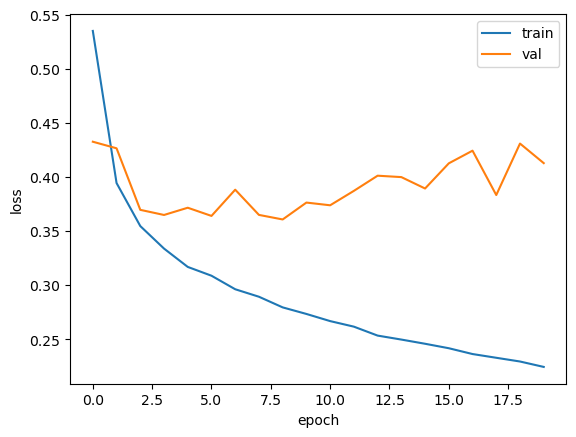

In [264]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

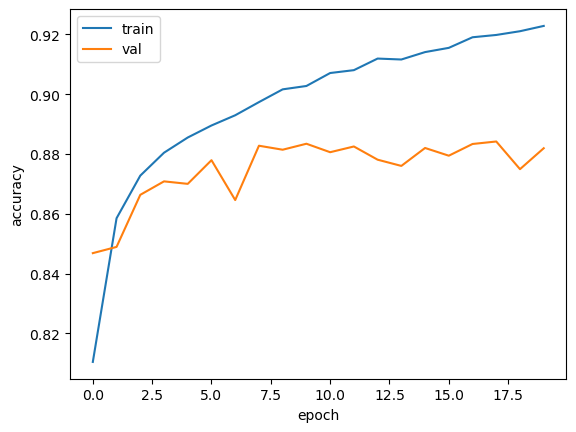

In [265]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [266]:
# optimizer를 adam으로 지정했을 경우 손실값이 좀 더 안정정인 값을 보여준다.
# 즉 조금 더 학습할 수 있는 여지가 있다.
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                   validation_data = (val_scaled, val_target))

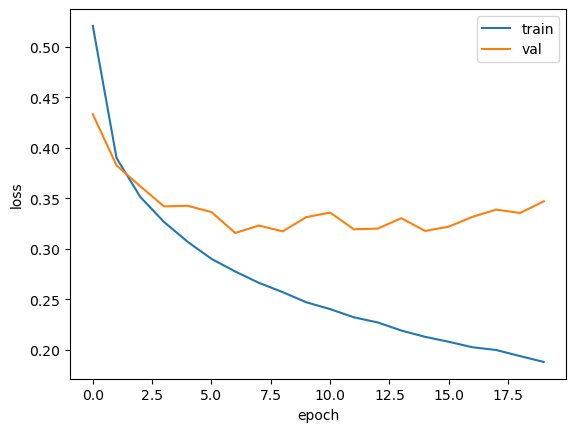

In [267]:
# epoch와 손실값 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

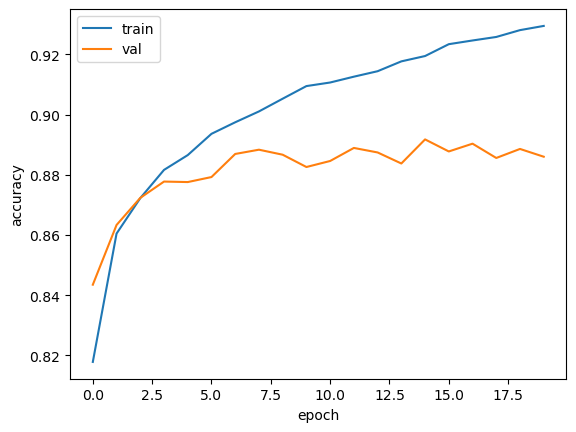

In [268]:
# epoch와 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃 옵션(은닉층의 특정 뉴런을 배제하여 정답률을 상향한다.)

In [270]:
# Dropout(0.3) => 은닉층의 30%는 랜덤하게 사용하지 않게 설정하여 과대적합을 제어한다.
# 케라스에서는 Dropout 층을 제어하고자 하는 층 다음에 삽입시킨다.
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_57 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [271]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# verbose 옵션 : 상세한 로깅을 출력할지 말지 조정하는 파라미터
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                   validation_data = (val_scaled, val_target))

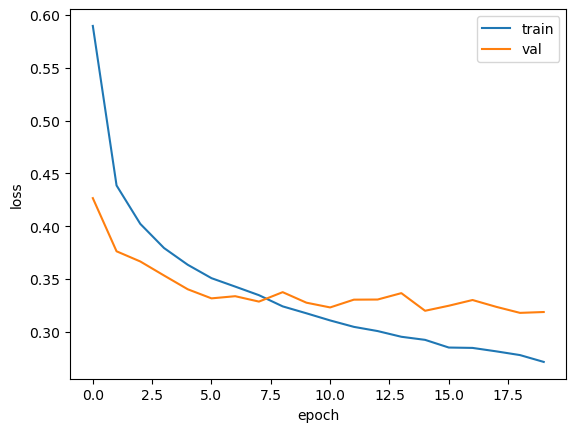

In [272]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

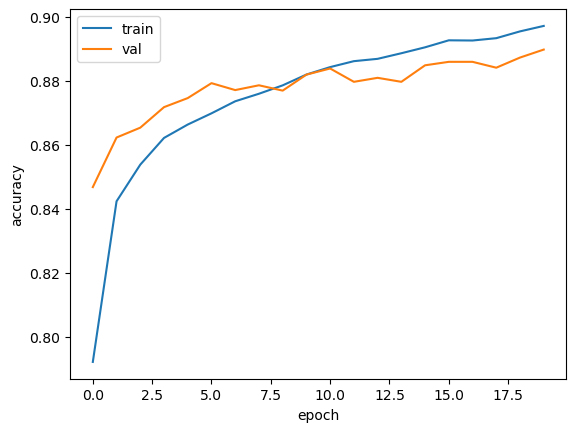

In [273]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [274]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                   validation_data = (val_scaled, val_target))

In [278]:
# 모델 파라메터만 저장하기
model.save_weights('model_weights.h5')

In [279]:
# 모델 전체를 저장하기
model.save('model_whols.h5')

In [281]:
!dir *.h5

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BC0D-FB82

 D:\Pywork\DataScience\04_AI\03_딥러닝 디렉터리

2023-01-27  오후 01:22         7,579,392 best-cnn-model.h5
2023-01-27  오후 12:40           981,176 best-model.h5
2023-01-27  오전 11:56           333,320 model-weights.h5
2023-01-27  오전 11:56           981,176 model-whole.h5
2023-01-27  오후 05:54           333,320 model_weights.h5
2023-01-27  오후 05:54           981,176 model_whols.h5
               6개 파일          11,189,560 바이트
               0개 디렉터리  520,084,389,888 바이트 남음


In [282]:
model = model_fn(keras.layers.Dropout(0.3))
# 저장했던 weights값을 로드하는 방법
model.load_weights('model_weights.h5')

In [286]:
model = model_fn(keras.layers.Dropout(0.3))
# 저장했던 save값을 로드하는 방법
new_model = tf.keras.models.load_model('model_whols.h5')

### 개별 예측값 검증

In [287]:
import numpy as np

In [288]:
model.predict(val_scaled).shape

375/375 [==============================] - 0s 944us/step


(12000, 10)

In [289]:
# 특정 값을 넣읐을 때 출력 값이 나올 확률 계산하기
model.predict(val_scaled)[0]

375/375 [==============================] - 0s 928us/step


array([0.10692053, 0.12256981, 0.15361655, 0.10619694, 0.02813324,
       0.05992404, 0.02824521, 0.0940825 , 0.04706157, 0.25324962],
      dtype=float32)

In [290]:
np.argmax(model.predict(val_scaled)[0])

375/375 [==============================] - 0s 977us/step


9

#### argmax의 이해
 * axis = 0 : 행을 고정하여 각 열의 최대값
 * axis = 1 : 열을 고정하여 각 행의 최대값

In [293]:
# argmax : 출력층에 전달된 예측 확률중 가장 큰 값을 선택한다.
# argmax 함수 인자 axis = -1의 의미: 마지막 차원의 값을 선택한다.
# 따라서 12000*10의 배열인 경우 axis = 1과 같은 효과를 낸다.
# 하나의 열 12000개의 행
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 946us/step
0.089


In [297]:
val_labels.shape

(12000,)

In [298]:
# 저장했던 save값을 로드하는 방법
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8772


[0.33784136176109314, 0.8771666884422302]

## 콜백
 * 훈련과정 중간에 특정 작업을 수행할 수 있게하는 객체이다.
 * 주로 조기 종료의 용도로 활용한다.

In [299]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# 훈련을 수행하는 동안 손실값이 가장 적은 모델을 저장하는 방법
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb])

In [300]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3150 - accuracy: 0.8870


[0.3150029182434082, 0.8870000243186951]

### 조기종료

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
# patience : 모델 성능이 향상되지 않는(손실값이 줄어들지 않는) 최대 에포크 (인내심)
# restore_best_weights : EarlyStop시 최적의 가중치 조건으로 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weight = True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 합성곱 신경망(Convolution Neural Network)을 사용한 이미지 분류(이미지에 특화된 인공신경망)

In [49]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [50]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [52]:
model = keras.Sequential()

In [54]:
# Conv2D(32 => 필터갯수, kernel_size = 3 => 3x3 사이즈의 커널 사용 activation = 'relu',
#        padding = 'same' => 입력과 특성맵의 사이즈가 같음, input_shape = (28,28,1))
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation ='relu',
                             padding = 'same', input_shape = (28,28,1)))

In [55]:
model.add(keras.layers.MaxPooling2D(2)) # 2x2 사이즈의 풀링을 적용

In [58]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                      

In [65]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [66]:
keras.utils.plot_model(model, show_shapes = True, to_file ='cnnarchitecture.png', dpi = 300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 모델 컴파일과 훈련

In [64]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5064 - accuracy: 0.8220 - val_loss: 0.3207 - val_accuracy: 0.8837
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3436 - accuracy: 0.8760 - val_loss: 0.2833 - val_accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3046 - accuracy: 0.8903 - val_loss: 0.2651 - val_accuracy: 0.8985
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2793 - accuracy: 0.8972 - val_loss: 0.2577 - val_accuracy: 0.9041
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2573 - accuracy: 0.9060 - val_loss: 0.2525 - val_accuracy: 0.9066
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2413 - accuracy: 0.9106 - val_loss: 0.2471 - val_accuracy: 0.9114
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2262 - accuracy: 0.9160 - val_loss: 0.2370 -

In [69]:
import matplotlib.pyplot as plt

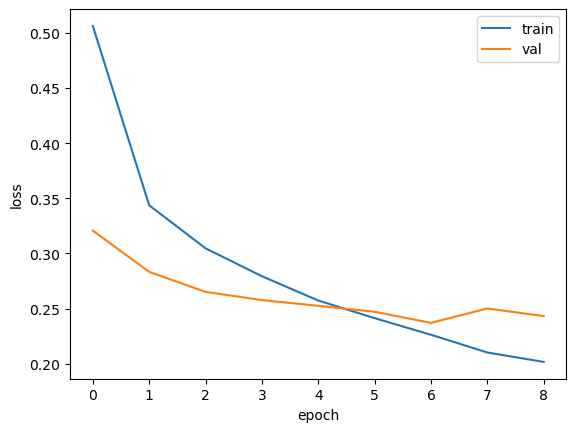

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [71]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.9159


[0.23702028393745422, 0.9159166812896729]

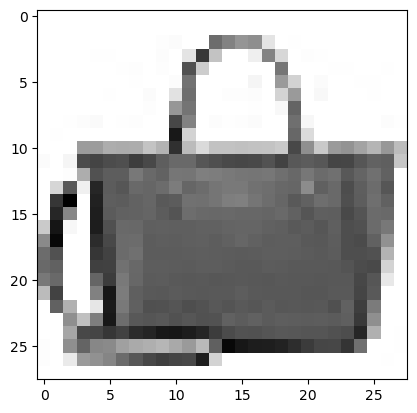

In [72]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [77]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 30ms/step
[[1.4221849e-14 1.1544830e-25 3.8350154e-15 6.9438054e-17 7.4357109e-15
  7.1529208e-13 7.6171198e-17 1.6598801e-13 1.0000000e+00 1.4399430e-14]]


In [83]:
preds.max()

1.0

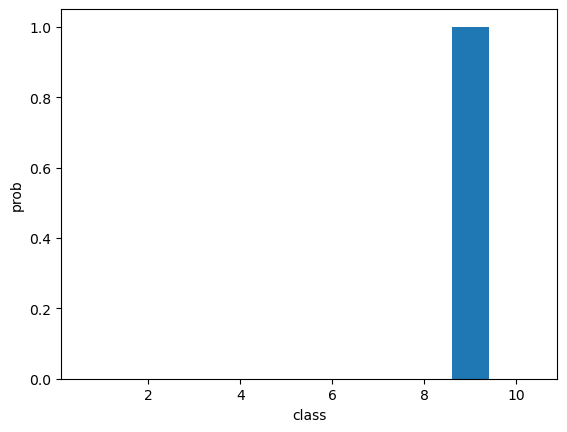

In [81]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [84]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [85]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [86]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [87]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2547 - accuracy: 0.9069


[0.25469261407852173, 0.9068999886512756]